In [2]:
import numpy as np

In [3]:
import pandas as pd

In [6]:
from subprocess import check_output
print(check_output(["ls", "../anaconda_projects"]).decode("utf8"))

Dataset_spine.csv
tesis.ipynb
Test Cuvino.csv



In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [12]:
df = pd.read_csv('../anaconda_projects/Dataset_spine.csv')

NameError: name 'pd' is not defined

In [10]:
df = df.drop(['Unnamed: 13'], axis=1)

In [12]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [13]:
df.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [14]:
df = df.drop(['Col7','Col8','Col9','Col10','Col11','Col12'], axis=1)

In [15]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [29]:
y = df['Class_att']
x = df.drop(['Class_att'], axis=1)


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)

In [19]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

In [36]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 4.26874505
Iteration 2, loss = 7.21713939
Iteration 3, loss = 1.55562179
Iteration 4, loss = 0.94416556
Iteration 5, loss = 1.50851327
Iteration 6, loss = 0.50784081
Iteration 7, loss = 0.39918410
Iteration 8, loss = 0.37867398
Iteration 9, loss = 0.37472479
Iteration 10, loss = 0.34567928
Iteration 11, loss = 0.34293793
Iteration 12, loss = 0.33180054
Iteration 13, loss = 0.33138624
Iteration 14, loss = 0.32280653
Iteration 15, loss = 0.32238711
Iteration 16, loss = 0.33164385
Iteration 17, loss = 0.31229600
Iteration 18, loss = 0.30823387
Iteration 19, loss = 0.32317560
Iteration 20, loss = 0.30697614
Iteration 21, loss = 0.30901736
Iteration 22, loss = 0.35327698
Iteration 23, loss = 0.31835192
Training loss did not improve more than tol=0.000000 for two consecutive epochs. Stopping.


In [21]:
accuracy_score(y_test, y_pred)

0.8461538461538461

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[48,  5],
       [ 7, 18]])

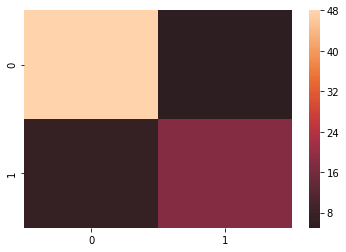

In [23]:
sns.heatmap(cm, center=True)
plt.show()